In [1]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import requests
import datetime as dt
import matplotlib.pyplot as plt

# Step 1: Reading Confirm_cases and Death_cases into their respective dataframes

### a) First reading Confirm_cases into dataframe

In [2]:
confirm_cases_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirm_cases_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205612,205612,205802,205830,205907,206073,206133,206145,206206,206273
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333322,333330,333330,333338,333343,333360,333381,333391,333408,333413
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271061,271061,271079,271082,271090,271096,271100,271102,271107,271113
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,47219,47219,47219,47219,47219,47219
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104676,104676,104676,104676,104676,104750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333746,333746,333746,333746,333746,333746,333746


### b) Now reading death_cases into dataframe

In [3]:
death_cases_df=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
death_cases_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7834,7834,7834,7834,7835
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,157,157,157,157,157,157
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1924,1924,1924,1924,1924,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


# Step 2)	Using pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level

### Before starting aggregation and sum, lets check the data of both dataframe for null values

In [4]:
confirm_cases_df.isna().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
12/1/22             0
12/2/22             0
12/3/22             0
12/4/22             0
12/5/22             0
Length: 1053, dtype: int64

In [5]:
death_cases_df.isna().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
12/1/22             0
12/2/22             0
12/3/22             0
12/4/22             0
12/5/22             0
Length: 1053, dtype: int64

### Removing Province/State columns from both dataframe as it contains 2/3 of data as null values. 
### Also Removing Lat and Long columns from both dataframe as we won't be using them for our requirements. 

In [6]:
confirm_cases_df.drop(columns=['Province/State','Lat','Long'], inplace=True)
confirm_cases_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,205612,205612,205802,205830,205907,206073,206133,206145,206206,206273
1,Albania,0,0,0,0,0,0,0,0,0,...,333322,333330,333330,333338,333343,333360,333381,333391,333408,333413
2,Algeria,0,0,0,0,0,0,0,0,0,...,271061,271061,271079,271082,271090,271096,271100,271102,271107,271113
3,Andorra,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,47219,47219,47219,47219,47219,47219
4,Angola,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104676,104676,104676,104676,104676,104750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,0,0,0,0,0,0,0,0,0,...,333721,333721,333721,333746,333746,333746,333746,333746,333746,333746


In [7]:
death_cases_df.drop(columns=['Province/State','Lat','Long'], inplace=True)
death_cases_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7834,7834,7834,7834,7835
1,Albania,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,156,156,156,156,157,157,157,157,157,157
4,Angola,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1924,1924,1924,1924,1924,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,Yemen,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,Zambia,0,0,0,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


### Now we will be start summing data across all the date for each country

In [8]:
df_confirmed = confirm_cases_df
df_confirmed = df_confirmed.groupby(['Country/Region']).sum()
df_confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,205612,205612,205802,205830,205907,206073,206133,206145,206206,206273
Albania,0,0,0,0,0,0,0,0,0,0,...,333322,333330,333330,333338,333343,333360,333381,333391,333408,333413
Algeria,0,0,0,0,0,0,0,0,0,0,...,271061,271061,271079,271082,271090,271096,271100,271102,271107,271113
Andorra,0,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,47219,47219,47219,47219,47219,47219
Angola,0,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104676,104676,104676,104676,104676,104750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [9]:
sum_confirm_cases = df_confirmed.sum(axis=1)
sum_confirm_cases = sum_confirm_cases.reset_index()
sum_confirm_cases.columns = ['Country','Total Confirm Cases']
sum_confirm_cases

,Country,Total Confirm Cases
0,Afghanistan,110421190
1,Albania,154163521
2,Algeria,157237915
3,Andorra,20057421
4,Angola,50145291
...,...,...
196,West Bank and Gaza,346441416
197,Winter Olympics 2022,164172
198,Yemen,6756605
199,Zambia,164137486


In [10]:
df_death = death_cases_df
df_death = df_death.groupby("Country/Region").sum()
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7834,7834,7834,7834,7835
Albania,0,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
Algeria,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,0,0,0,0,0,0,0,0,0,0,...,156,156,156,156,157,157,157,157,157,157
Angola,0,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1924,1924,1924,1924,1924,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159


In [11]:
sum_df_death = df_death.sum(axis=1)
sum_df_death = sum_df_death.reset_index()
sum_df_death.columns = ['Country','Total Death Cases']
sum_df_death

,Country,Total Death Cases
0,Afghanistan,4681699
1,Albania,2147369
2,Algeria,4254461
3,Andorra,111779
4,Angola,1050413
...,...,...
196,West Bank and Gaza,3218157
197,Winter Olympics 2022,0
198,Yemen,1312500
199,Zambia,2252161


### Finally we will integrate both sum dataframes into one dataframe

In [12]:
aggregate_df = pd.merge(sum_confirm_cases, sum_df_death, on='Country')
aggregate_df

,Country,Total Confirm Cases,Total Death Cases
0,Afghanistan,110421190,4681699
1,Albania,154163521,2147369
2,Algeria,157237915,4254461
3,Andorra,20057421,111779
4,Angola,50145291,1050413
...,...,...,...
196,West Bank and Gaza,346441416,3218157
197,Winter Olympics 2022,164172,0
198,Yemen,6756605,1312500
199,Zambia,164137486,2252161


# Step 3: Using AlphaVantage (the stock API used earlier in the course)

In [13]:
api_key = '4D1LCJ81R5XTAAD3'
ts = TimeSeries(key=api_key,output_format='pandas')

# Step 4: Now we will Research a stock from the following industries and get their High and Low price  

In [14]:
# Since data available from confirmed and death cases is from Jan-22-2020, we will be get stock data for below dates
#start_date = dt.datetime(2020, 1, 21)
#end_date = dt.datetime(2022, 12, 31)



## 1) American Market

#### a) There are 2 major Stock Markets in America i.e. NYSE and NASDAQ, Over here we will working on NASDAQ

In [15]:
USA = ts.get_daily_adjusted(symbol='NASDX', outputsize ='full')
    # Create a filtered dataframe, and change the order it is displayed. 
#USA_df = USA[(USA.index >= start_date) & (USA.index <= end_date)]
#USA_df = USA_df.sort_index(ascending=True)
USA_df = pd.DataFrame(USA[0])
USA_df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2022-12-02,25.90,25.90,25.90,25.90,25.900000,0.0,0.0000,1.0
2022-12-01,26.01,26.01,26.01,26.01,26.010000,0.0,0.0000,1.0
2022-11-30,25.97,25.97,25.97,25.97,25.970000,0.0,0.7655,1.0
2022-11-29,25.57,25.57,25.57,25.57,24.837906,0.0,0.0000,1.0
2022-11-28,25.75,25.75,25.75,25.75,25.012753,0.0,0.0000,1.0
...,...,...,...,...,...,...,...,...
2000-01-24,9.74,9.74,9.74,9.74,7.623707,0.0,0.0000,1.0
2000-01-21,10.07,10.07,10.07,10.07,7.882005,0.0,0.0000,1.0
2000-01-20,10.06,10.06,10.06,10.06,7.874178,0.0,0.0000,1.0


#### b) Getting the daily high and low prices for American Market

In [16]:
USA_df = USA_df.reset_index(level=0)
USA_df = USA_df[['date','2. high','3. low']]
USA_df.columns = ['Date', 'US_High','US_Low']
USA_df

,Date,US_High,US_Low
0,2022-12-02,25.90,25.90
1,2022-12-01,26.01,26.01
2,2022-11-30,25.97,25.97
3,2022-11-29,25.57,25.57
4,2022-11-28,25.75,25.75
...,...,...,...
5753,2000-01-24,9.74,9.74
5754,2000-01-21,10.07,10.07
5755,2000-01-20,10.06,10.06
5756,2000-01-19,10.00,10.00


## 2) Canadian Market
#### a) We will be Researching Canadian Market


In [17]:
canada = ts.get_daily_adjusted(symbol='XIU.TRT', outputsize ='full')
#canada_df = canada[(canada.index >= start_date) & (canada.index <= end_date)]
#canada_df = canada_df.sort_index(ascending=True)
canada_df = pd.DataFrame(canada[0])
canada_df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2022-12-05,31.23,31.26,30.87,30.96,30.9600,2354440.0,0.0,1.0
2022-12-02,31.18,31.39,31.12,31.28,31.2800,1484100.0,0.0,1.0
2022-12-01,31.46,31.55,31.31,31.35,31.3500,3349400.0,0.0,1.0
2022-11-30,31.13,31.29,30.81,31.26,31.2600,3106100.0,0.0,1.0
2022-11-29,31.12,31.14,30.97,31.05,31.0500,1371700.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2005-01-10,50.02,50.20,49.97,50.09,7.6694,2631600.0,0.0,1.0
2005-01-07,50.54,50.54,49.62,49.99,7.6541,3436800.0,0.0,1.0
2005-01-06,50.30,50.52,50.25,50.44,7.7230,3220400.0,0.0,1.0


#### b) Getting the daily high and low prices for Canadian Market

In [18]:
canada_df = canada_df.reset_index(level=0)
canada_df = canada_df[['date','2. high','3. low']]
canada_df.columns = ['Date', 'CAN_High','CAN_Low']
canada_df

,Date,CAN_High,CAN_Low
0,2022-12-05,31.26,30.87
1,2022-12-02,31.39,31.12
2,2022-12-01,31.55,31.31
3,2022-11-30,31.29,30.81
4,2022-11-29,31.14,30.97
...,...,...,...
4496,2005-01-10,50.20,49.97
4497,2005-01-07,50.54,49.62
4498,2005-01-06,50.52,50.25
4499,2005-01-05,50.80,50.17


## 3) Travel Sector
#### a) Researching Travel Sector Market by taking stocks of AIR CANADA

In [19]:
travel = ts.get_daily_adjusted(symbol='AC.TRT', outputsize ='full')
#travel_df = travel[(travel.index >= start_date) & (travel.index <= end_date)]
#travel_df = travel_df.sort_index(ascending=True)
travel_df = pd.DataFrame(travel[0])
travel_df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2022-12-05,19.02,19.41,18.97,19.27,19.27,2759678.0,0.0,1.0
2022-12-02,18.90,19.17,18.81,19.06,19.06,1578100.0,0.0,1.0
2022-12-01,19.34,19.36,19.03,19.10,19.10,1716800.0,0.0,1.0
2022-11-30,18.99,19.32,18.76,19.29,19.29,2859500.0,0.0,1.0
2022-11-29,18.67,19.07,18.63,18.92,18.92,1403000.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2006-11-23,19.29,19.49,19.01,19.45,19.45,423204.0,0.0,1.0
2006-11-22,17.75,19.13,17.75,19.10,19.10,616310.0,0.0,1.0
2006-11-21,18.75,18.75,17.50,17.86,17.86,1943962.0,0.0,1.0


#### b) Getting the daily high and low prices for Travel Sector Market

In [20]:
travel_df = travel_df.reset_index(level=0)
travel_df = travel_df[['date','2. high','3. low']]
travel_df.columns = ['Date', 'Travel_High','Travel_Low']
travel_df

,Date,Travel_High,Travel_Low
0,2022-12-05,19.41,18.97
1,2022-12-02,19.17,18.81
2,2022-12-01,19.36,19.03
3,2022-11-30,19.32,18.76
4,2022-11-29,19.07,18.63
...,...,...,...
4023,2006-11-23,19.49,19.01
4024,2006-11-22,19.13,17.75
4025,2006-11-21,18.75,17.50
4026,2006-11-20,19.50,18.40


## 4) Real Estate
#### a) Researching Real Estate Market stock of Annaly Capital Management Inc.

In [21]:
real_estate = ts.get_daily_adjusted(symbol='NLY', outputsize ='full')
#real_estate_df = real_estate[(real_estate.index >= start_date) & (real_estate.index <= end_date)]
#real_estate_df = real_estate_df.sort_index(ascending=True)
real_estate_df = pd.DataFrame(real_estate[0])
real_estate_df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2022-12-05,21.730,21.820,21.240,21.260,21.260000,4681867.0,0.0,1.0
2022-12-02,21.790,21.860,21.330,21.790,21.790000,4547559.0,0.0,1.0
2022-12-01,21.750,22.190,21.750,21.880,21.880000,6627538.0,0.0,1.0
2022-11-30,21.100,21.795,20.950,21.670,21.670000,16444898.0,0.0,1.0
2022-11-29,21.200,21.260,21.020,21.210,21.210000,4512323.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1999-11-05,9.125,9.438,9.063,9.250,2.585148,35700.0,0.0,1.0
1999-11-04,9.313,9.438,9.125,9.250,2.585148,23800.0,0.0,1.0
1999-11-03,9.250,9.500,9.125,9.313,2.602755,36000.0,0.0,1.0


#### b) Getting the daily high and low prices for Real Estate Market

In [22]:
real_estate_df = real_estate_df.reset_index(level=0)
real_estate_df = real_estate_df[['date','2. high','3. low']]
real_estate_df.columns = ['Date', 'Real_Estate_High','Real_Estate_Low']
real_estate_df

,Date,Real_Estate_High,Real_Estate_Low
0,2022-12-05,21.820,21.240
1,2022-12-02,21.860,21.330
2,2022-12-01,22.190,21.750
3,2022-11-30,21.795,20.950
4,2022-11-29,21.260,21.020
...,...,...,...
5807,1999-11-05,9.438,9.063
5808,1999-11-04,9.438,9.125
5809,1999-11-03,9.500,9.125
5810,1999-11-02,9.188,8.938


## 5) Precious Metal - Gold
#### a) Researching Precious Metal Market Stock of Barrick Gold Corp

In [23]:
precious_metals = ts.get_daily_adjusted(symbol='GOLD', outputsize ='full')
#precious_metals_df = precious_metals[(precious_metals.index >= start_date) & (precious_metals.index <= end_date)]
#precious_metals_df = precious_metals_df.sort_index(ascending=True)
precious_metals_df = pd.DataFrame(precious_metals[0])
precious_metals_df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2022-12-05,16.81,16.9092,16.47,16.52,16.520000,21242900.0,0.00,1.0
2022-12-02,16.78,17.1400,16.58,16.98,16.980000,18763740.0,0.00,1.0
2022-12-01,16.75,17.3400,16.67,17.09,17.090000,31207840.0,0.00,1.0
2022-11-30,16.03,16.4400,15.87,16.32,16.320000,25458234.0,0.00,1.0
2022-11-29,15.59,15.9600,15.54,15.87,15.870000,15770773.0,0.05,1.0
...,...,...,...,...,...,...,...,...
1999-11-05,17.56,17.6900,17.13,17.19,12.730380,1510400.0,0.00,1.0
1999-11-04,17.69,17.9400,17.56,17.69,13.100664,1963000.0,0.00,1.0
1999-11-03,18.19,18.2500,17.75,17.88,13.241372,1454300.0,0.00,1.0


#### b) Getting the daily high and low prices for Precious Metal Market

In [24]:
precious_metals_df = precious_metals_df.reset_index(level=0)
precious_metals_df = precious_metals_df[['date','2. high','3. low']]
precious_metals_df.columns = ['Date', 'Gold_High','Gold_Low']
precious_metals_df

,Date,Gold_High,Gold_Low
0,2022-12-05,16.9092,16.47
1,2022-12-02,17.1400,16.58
2,2022-12-01,17.3400,16.67
3,2022-11-30,16.4400,15.87
4,2022-11-29,15.9600,15.54
...,...,...,...
5807,1999-11-05,17.6900,17.13
5808,1999-11-04,17.9400,17.56
5809,1999-11-03,18.2500,17.75
5810,1999-11-02,18.2500,17.63


## Now we will merge all markets dataframe on Date

In [25]:
overall_market_df = USA_df.merge(canada_df,on='Date').merge(travel_df,on='Date').merge(real_estate_df,on='Date').merge(precious_metals_df,on='Date')
overall_market_df

,Date,US_High,US_Low,CAN_High,CAN_Low,Travel_High,Travel_Low,Real_Estate_High,Real_Estate_Low,Gold_High,Gold_Low
0,2022-12-02,25.90,25.90,31.39,31.12,19.17,18.81,21.860,21.33,17.14,16.58
1,2022-12-01,26.01,26.01,31.55,31.31,19.36,19.03,22.190,21.75,17.34,16.67
2,2022-11-30,25.97,25.97,31.29,30.81,19.32,18.76,21.795,20.95,16.44,15.87
3,2022-11-29,25.57,25.57,31.14,30.97,19.07,18.63,21.260,21.02,15.96,15.54
4,2022-11-28,25.75,25.75,31.24,30.92,19.32,18.71,21.550,21.00,16.09,15.50
...,...,...,...,...,...,...,...,...,...,...,...
3949,2006-11-24,4.54,4.54,73.33,72.80,19.45,19.00,14.040,14.00,29.94,29.65
3950,2006-11-22,4.55,4.55,72.94,72.37,19.13,17.75,14.070,13.88,29.47,28.81
3951,2006-11-21,4.52,4.52,73.12,72.08,18.75,17.50,14.020,13.75,29.25,28.74
3952,2006-11-20,4.51,4.51,72.33,71.55,19.50,18.40,13.940,13.75,28.95,28.32


# Step 5: Now we will merge overall markets dataframe with df_confirmed and df_death dataframes

In [26]:
df_confirmed_new = df_confirmed.reset_index()
df_death_new = df_death.reset_index()

### Since Overall Market dataframes deals with US and Canada only, we will take confirm and death cases of these countries only 

In [27]:
usa_case = df_confirmed_new[df_confirmed_new['Country/Region']=='US']
can_case = df_confirmed_new[df_confirmed_new['Country/Region']=='Canada']
usa_can_case = pd.concat([usa_case,can_case,], ignore_index=True)
usa_can_case

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,US,1,1,2,2,5,5,5,6,6,...,98569058,98573468,98633140,98697622,98807782,98924207,98962019,98967906,98972375,99023619
1,Canada,0,2,3,3,3,3,4,4,4,...,4428546,4428546,4430558,4431111,4432426,4444843,4444912,4444912,4444912,4444912


In [28]:
can_death = df_death_new[df_death_new['Country/Region']=='Canada']
usa_death = df_death_new[df_death_new['Country/Region']=='US']
usa_can_death = pd.concat([usa_death, can_death], ignore_index=True)
usa_can_death

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,US,0,0,0,0,0,0,0,0,0,...,1079296,1079296,1079576,1079969,1080536,1081147,1081412,1081431,1081431,1081638
1,Canada,0,0,0,0,0,0,0,0,0,...,47862,47862,47923,47923,48002,48133,48133,48133,48133,48133


### Now we will transpose both combined dataframe of USA and Canada confirm cases to match our overall market dataframe

In [29]:
final_confirm_cases = usa_can_case.transpose()
final_confirm_cases = final_confirm_cases.reset_index()
final_confirm_cases.columns = ['date','USA_Confirmed_Cases','Canada_Confirmed_Cases']
final_confirm_cases = final_confirm_cases.iloc[1: , :]
final_confirm_cases

,date,USA_Confirmed_Cases,Canada_Confirmed_Cases
1,1/22/20,1,0
2,1/23/20,1,2
3,1/24/20,2,3
4,1/25/20,2,3
5,1/26/20,5,3
...,...,...,...
1045,12/1/22,98924207,4444843
1046,12/2/22,98962019,4444912
1047,12/3/22,98967906,4444912
1048,12/4/22,98972375,4444912


### Now we will transpose both combined dataframe of USA and Canada death cases to match our overall market dataframe

In [30]:
final_death = usa_can_death.transpose()
final_death = final_death.reset_index()
final_death.columns = ['date','US_Death','Canada_Death']
final_death = final_death.iloc[1: , :]
final_death

,date,US_Death,Canada_Death
1,1/22/20,0,0
2,1/23/20,0,0
3,1/24/20,0,0
4,1/25/20,0,0
5,1/26/20,0,0
...,...,...,...
1045,12/1/22,1081147,48133
1046,12/2/22,1081412,48133
1047,12/3/22,1081431,48133
1048,12/4/22,1081431,48133


### Merging confirm cases and death cases dataframe 

In [31]:
final_df = final_confirm_cases.merge(final_death,on='date')
final_df

,date,USA_Confirmed_Cases,Canada_Confirmed_Cases,US_Death,Canada_Death
0,1/22/20,1,0,0,0
1,1/23/20,1,2,0,0
2,1/24/20,2,3,0,0
3,1/25/20,2,3,0,0
4,1/26/20,5,3,0,0
...,...,...,...,...,...
1044,12/1/22,98924207,4444843,1081147,48133
1045,12/2/22,98962019,4444912,1081412,48133
1046,12/3/22,98967906,4444912,1081431,48133
1047,12/4/22,98972375,4444912,1081431,48133


### Changing date format to match overall market date format

In [32]:
final_df['Date']=pd.to_datetime(final_df['date'])
final_df.drop(columns=['date'], inplace=True)
final_df

,USA_Confirmed_Cases,Canada_Confirmed_Cases,US_Death,Canada_Death,Date
0,1,0,0,0,2020-01-22
1,1,2,0,0,2020-01-23
2,2,3,0,0,2020-01-24
3,2,3,0,0,2020-01-25
4,5,3,0,0,2020-01-26
...,...,...,...,...,...
1044,98924207,4444843,1081147,48133,2022-12-01
1045,98962019,4444912,1081412,48133,2022-12-02
1046,98967906,4444912,1081431,48133,2022-12-03
1047,98972375,4444912,1081431,48133,2022-12-04


# <font color = 'green'>Finally</font> merging overall market dataframe with final_df using left join

In [33]:
USA_Canada_final = final_df.merge(overall_market_df, on='Date', how='left')
USA_Canada_final

,USA_Confirmed_Cases,Canada_Confirmed_Cases,US_Death,Canada_Death,Date,US_High,US_Low,CAN_High,CAN_Low,Travel_High,Travel_Low,Real_Estate_High,Real_Estate_Low,Gold_High,Gold_Low
0,1,0,0,0,2020-01-22,21.00,21.00,26.57,26.37,49.68,48.64,9.78,9.68,18.40,18.17
1,1,2,0,0,2020-01-23,21.07,21.07,26.52,26.38,49.00,47.01,9.73,9.68,18.68,18.18
2,2,3,0,0,2020-01-24,20.90,20.90,26.57,26.36,48.58,45.77,9.74,9.63,18.75,18.35
3,2,3,0,0,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,0,0,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,98924207,4444843,1081147,48133,2022-12-01,26.01,26.01,31.55,31.31,19.36,19.03,22.19,21.75,17.34,16.67
1045,98962019,4444912,1081412,48133,2022-12-02,25.90,25.90,31.39,31.12,19.17,18.81,21.86,21.33,17.14,16.58
1046,98967906,4444912,1081431,48133,2022-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047,98972375,4444912,1081431,48133,2022-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visual Representation by Graphs
### 1) Lets see changes in gold price since Covid 


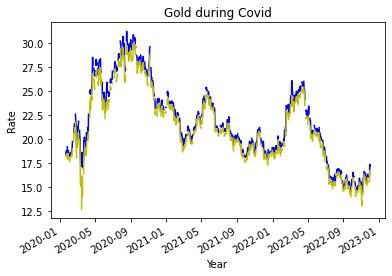

In [34]:
fig = plt.figure()

plt.plot_date(USA_Canada_final['Date'], USA_Canada_final['Gold_High'], 'b')
plt.plot_date(USA_Canada_final['Date'], USA_Canada_final['Gold_Low'], 'y')
plt.title("Gold during Covid")
plt.xlabel('Year ')
plt.ylabel('Rate')

fig.autofmt_xdate()
plt.show()

- <font color='red'>Observations</font>: <font color='green'>From above graph, we can see that gold prices went quite high during peak time of covid, but now in post covid era, it has again come down to approximately price it was at start of Jan 2020. Also, around May 2020, there was huge difference between daily high and low prices but apart from them the daily price has been consistent</font>

### 2) Ratio of Death Cases Caused Due To Covid between USA and Canada

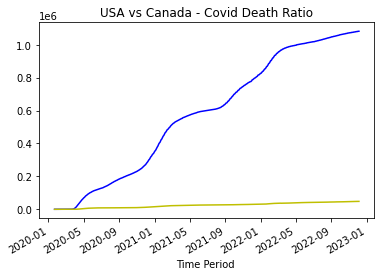

In [35]:
fig = plt.figure()
plt.plot(USA_Canada_final['Date'], USA_Canada_final['US_Death'],'b')
plt.plot(USA_Canada_final['Date'], USA_Canada_final['Canada_Death'],'y')
plt.title("USA vs Canada - Covid Death Ratio")
plt.xlabel('Time Period ')
plt.ylabel('')

fig.autofmt_xdate()
plt.show()

- <font color='red'>Observations</font>:   <font color='green'>Here we took this graph to see how many people died in USA compare to Canada due to covid. And its clear from the graph that USA suffered more loss of lives in comparison to Canada.</font>

### 3) Vizualizing Canadian Market Using Scatterplot

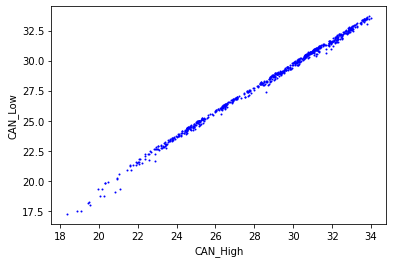

In [36]:
USA_Canada_final.plot.scatter(x='CAN_High', y='CAN_Low', s = 1, c='blue');

- <font color='red'>Observation</font>: <font color='green'>Here we wanted to see how far Canadian Market high and low daily values were spread out from each other. But according to this plot, they are not too far stretched out.</font>

### 4) Comparison of Stock Market of USA and Canada Since Covid

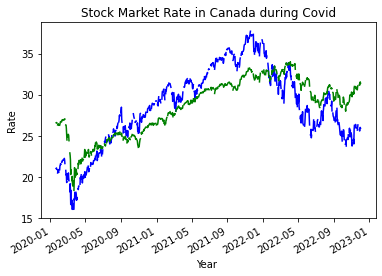

In [37]:
fig = plt.figure()

plt.plot(USA_Canada_final['Date'], USA_Canada_final['US_High'], 'b')
plt.plot(USA_Canada_final['Date'], USA_Canada_final['CAN_High'], 'g')
plt.title("Stock Market Rate in Canada during Covid")
plt.xlabel('Year ')
plt.ylabel('Rate')

fig.autofmt_xdate()
plt.show()

- <font color='red'>Observations</font>: <font color='green'>Here we wanted to see what impact covid had on market of USA and Canada, but we can clearly see here that market of both nations flourished during the covid. American market grew at faster rate than Canada till start of 2022, but since than American market has seen sudden fall.</font>

### 5. Ratio of Covid Cases vs Covid Deaths in USA

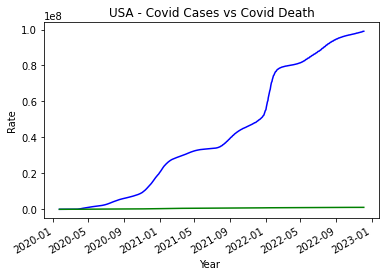

In [38]:
fig = plt.figure()

plt.plot(USA_Canada_final['Date'], USA_Canada_final['USA_Confirmed_Cases'], 'b-')
plt.plot(USA_Canada_final['Date'], USA_Canada_final['US_Death'], 'g-')
plt.title("USA - Covid Cases vs Covid Death")
plt.xlabel('Year ')
plt.ylabel('Rate')

fig.autofmt_xdate()
plt.show()

- <font color='red'>Observations</font>: <font color='green'>Here we wanted to see how much America was impacted by covid, by seeing how many people were infected with covid and how many people loss life due to it.</font>

### 6. Ratio of Covid Cases vs Covid Deaths in Canada

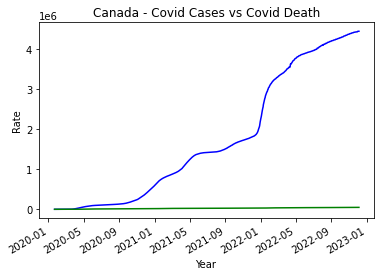

In [39]:
fig = plt.figure()

plt.plot(USA_Canada_final['Date'], USA_Canada_final['Canada_Confirmed_Cases'], 'b-')
plt.plot(USA_Canada_final['Date'], USA_Canada_final['Canada_Death'], 'g-')
plt.title("Canada - Covid Cases vs Covid Death")
plt.xlabel('Year ')
plt.ylabel('Rate')

fig.autofmt_xdate()
plt.show()

- <font color='red'>Observations</font>: - <font color='green'>Here we wanted to see how much Canada was impacted by covid, by seeing how many people were infected with covid and how many people loss life due to it.</font>

### 7. Comparison of Travel and Real Estate Sector

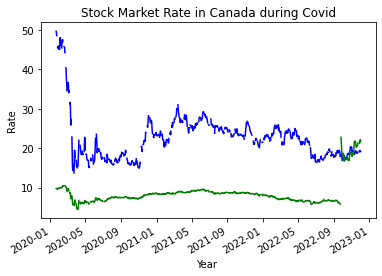

In [40]:
fig = plt.figure()

plt.plot(USA_Canada_final['Date'], USA_Canada_final['Travel_High'], 'b')
plt.plot(USA_Canada_final['Date'], USA_Canada_final['Real_Estate_High'], 'g')
plt.title("Stock Market Rate in Canada during Covid")
plt.xlabel('Year ')
plt.ylabel('Rate')

fig.autofmt_xdate()
plt.show()

- <font color='red'>Observation </font>: <font color =green> Here we took this graph as we wanted to see effect of covid on the market of Travel Sector stock(Air Canada) as well as Real estate sector stock(Annaly Capital Management Inc.). From the graph we can see that there was no real challenge to real estate sector but travel sector suffered a huge loss during the same period.</font>